# Up states: Stability of Forced-Balance learning rule

Soldado-Magraner, Laje & Buonomano (2020)  
Author: Rodrigo Laje

#### Neural subsystem

Load script, prevent output:

In [1]:
%%capture
load('up states - Neural subsystem stability.sage.py')

## Synaptic subsystem: Forced-Balance rule

#### Forced-Balance rule equations

Weights $W_{EE}$ and $W_{IE}$ converge to the Up state (if stable), while $W_{EI}$ and $W_{II}$ are non-instantaneous followers (i.e. they decay to the corresponding line attractor)

In [2]:
var('dWEEdt,dWIEdt')
var('E_set,I_set,alpha_1,alpha_3')
f_WEE = dWEEdt == alpha_1*g_E*E*(E_set-E)
f_WIE = dWIEdt == -alpha_3*g_I*E*(I_set-I)
show(f_WEE)
show(f_WIE)

dWEEdt == -(E - E_set)*E*alpha_1*g_E

dWIEdt == E*(I - I_set)*alpha_3*g_I

The other two weights are (non-instantaneous) followers of $W_{EE}$ and $W_{IE}$:

In [3]:
WEI_ff,WII_ff = solve([E.subs(E_up)==E_set,I.subs(I_up)==I_set],W_EI,W_II)[0]
show(WEI_ff)
show(WII_ff)

W_EI == ((E_set*W_EE - Theta_E)*g_E - E_set)/(I_set*g_E)

W_II == ((E_set*W_IE - Theta_I)*g_I - I_set)/(I_set*g_I)

In [4]:
var('dWEIdt,dWIIdt,tau_ff')
f_WEI = dWEIdt == (W_EI.subs(WEI_ff) - W_EI)/tau_ff
f_WII = dWIIdt == (W_II.subs(WII_ff) - W_II)/tau_ff

Full synaptic subsystem:

In [5]:
show(f_WEE)
show(f_WEI)
show(f_WIE)
show(f_WII)

dWEEdt == -(E - E_set)*E*alpha_1*g_E

dWEIdt == -(W_EI - ((E_set*W_EE - Theta_E)*g_E - E_set)/(I_set*g_E))/tau_ff

dWIEdt == E*(I - I_set)*alpha_3*g_I

dWIIdt == -(W_II - ((E_set*W_IE - Theta_I)*g_I - I_set)/(I_set*g_I))/tau_ff

In [6]:
synapticFixedPoint = solve([f_WEE.subs(dWEEdt==0),f_WEI.subs(dWEIdt==0),f_WIE.subs(dWIEdt==0),f_WII.subs(dWIIdt==0)],E,I,W_EI,W_II)
synapticFixedPoint_up = synapticFixedPoint[1]

Two solutions but only one of them is compatible with suprathreshold activity:

#### Fixed point: Up state  
$E=E_{set}$, $I=I_{set}$ ($W_{EE}$ and $W_{IE}$ can take any value)

In [7]:
show(synapticFixedPoint_up)

[E == E_set,
 I == I_set,
 W_EI == ((E_set*W_EE - Theta_E)*g_E - E_set)/(I_set*g_E),
 W_II == ((E_set*W_IE - Theta_I)*g_I - I_set)/(I_set*g_I)]

## Quasi-steady-state approximation
1. Full system neural+synaptic
2. Nondimensionalization
3. Normalization
4. Approximation (fast neural subsystem)

### Full system

In [8]:
show(f_E)
show(f_I)
show(f_WEE)
show(f_WEI)
show(f_WIE)
show(f_WII)

dEdt == ((E*W_EE - I*W_EI - Theta_E)*g_E - E)/tau_E

dIdt == ((E*W_IE - I*W_II - Theta_I)*g_I - I)/tau_I

dWEEdt == -(E - E_set)*E*alpha_1*g_E

dWEIdt == -(W_EI - ((E_set*W_EE - Theta_E)*g_E - E_set)/(I_set*g_E))/tau_ff

dWIEdt == E*(I - I_set)*alpha_3*g_I

dWIIdt == -(W_II - ((E_set*W_IE - Theta_I)*g_I - I_set)/(I_set*g_I))/tau_ff

### Nondimensionalization

#### Definition of nondimensional variables  
Define new (nondimensional) variables $e$, $i$, etc. and scaling parameters $E_0$, $I_0$, etc:  
$e = E/E_0$  
$i = I/I_0$  
$\tau = t/\tau_0$  
$w_{EE} = W_{EE}/W_{EE0}$  
... etc

In [9]:
var('e,i')
var('E_0,I_0,tau_0')
var('w_EE,w_EI,w_IE,w_II')
var('W_EE0,W_EI0,W_IE0,W_II0')
var('dedtau,didtau')
var('dwEEdtau,dwEIdtau,dwIEdtau,dwIIdtau');

Replacement rules:

In [10]:
nondim = [E==E_0*e,dEdt==(E_0/tau_0)*dedtau,I==I_0*i,dIdt==(I_0/tau_0)*didtau,W_EE==W_EE0*w_EE,W_EI==W_EI0*w_EI,W_IE==W_IE0*w_IE,W_II==W_II0*w_II,dWEEdt==(W_EE0/tau_0)*dwEEdtau,dWEIdt==(W_EI0/tau_0)*dwEIdtau,dWIEdt==(W_IE0/tau_0)*dwIEdtau,dWIIdt==(W_II0/tau_0)*dwIIdtau]
show(nondim)

[E == E_0*e,
 dEdt == E_0*dedtau/tau_0,
 I == I_0*i,
 dIdt == I_0*didtau/tau_0,
 W_EE == W_EE0*w_EE,
 W_EI == W_EI0*w_EI,
 W_IE == W_IE0*w_IE,
 W_II == W_II0*w_II,
 dWEEdt == W_EE0*dwEEdtau/tau_0,
 dWEIdt == W_EI0*dwEIdtau/tau_0,
 dWIEdt == W_IE0*dwIEdtau/tau_0,
 dWIIdt == W_II0*dwIIdtau/tau_0]

Full system after replacement:

In [11]:
f_e = f_E.subs(nondim)*tau_E/E_0
f_i = f_I.subs(nondim)*tau_I/I_0
f_wEE = f_WEE.subs(nondim)*tau_0/W_EE0
f_wEI = f_WEI.subs(nondim)*tau_0/W_EI0
f_wIE = f_WIE.subs(nondim)*tau_0/W_IE0
f_wII = f_WII.subs(nondim)*tau_0/W_II0
show(f_e.expand())
show(f_i.expand())
show(f_wEE.expand())
show(f_wEI.expand())
show(f_wIE.expand())
show(f_wII.expand())

dedtau*tau_E/tau_0 == W_EE0*e*g_E*w_EE - I_0*W_EI0*g_E*i*w_EI/E_0 - e - Theta_E*g_E/E_0

didtau*tau_I/tau_0 == E_0*W_IE0*e*g_I*w_IE/I_0 - W_II0*g_I*i*w_II - Theta_I*g_I/I_0 - i

dwEEdtau == -E_0^2*alpha_1*e^2*g_E*tau_0/W_EE0 + E_0*E_set*alpha_1*e*g_E*tau_0/W_EE0

dwEIdtau == E_set*W_EE0*tau_0*w_EE/(I_set*W_EI0*tau_ff) - tau_0*w_EI/tau_ff - Theta_E*tau_0/(I_set*W_EI0*tau_ff) - E_set*tau_0/(I_set*W_EI0*g_E*tau_ff)

dwIEdtau == E_0*I_0*alpha_3*e*g_I*i*tau_0/W_IE0 - E_0*I_set*alpha_3*e*g_I*tau_0/W_IE0

dwIIdtau == E_set*W_IE0*tau_0*w_IE/(I_set*W_II0*tau_ff) - tau_0*w_II/tau_ff - Theta_I*tau_0/(I_set*W_II0*tau_ff) - tau_0/(W_II0*g_I*tau_ff)

### Normalization of equations  
Choose scaling parameters such that nondimensional variables are of order 1:  
$\tau_0 = 1/(\alpha_1 g_E g_I E_{set} I_{set})$  
$\tau_{ff} = \tau_0$  
$E_0 = E_{set}$  
$I_0 = I_{set}$  
$W_{EE0} = R/g_I$  
$W_{EI0} = R/g_E$  
$W_{IE0} = 1/(\alpha g_E)$  
$W_{II0} = 1/g_I$  

Define new parameters:  
$\epsilon_E = \tau_E/\tau_0$  
$\epsilon_I = \tau_I/\tau_0$  
$R = E_{set}/I_{set}$  
$\alpha = \alpha_1/\alpha_3$  
$g = g_I/g_E$  
$\theta_E = (g_E/E_{set}) \Theta_E$  
$\theta_I = (g_I/I_{set}) \Theta_I$

In [12]:
var('epsilon_E,epsilon_I')
var('theta_E,theta_I,R,g,alpha')
normaliz = [tau_0==1/(alpha_1*g_E*g_I*E_set*I_set),tau_ff==tau_0,tau_E==epsilon_E*tau_0,tau_I==epsilon_I*tau_0,E_0==E_set,I_0==I_set,W_EE0==R/g_I,W_EI0==R/g_E,W_IE0==1/(alpha*g_E),W_II0==1/g_I,I_set==E_set/R,Theta_E==theta_E*E_set/g_E,Theta_I==theta_I*I_set/g_I,g_E==g*g_I,alpha_1==alpha*alpha_3]
show(normaliz)

[tau_0 == 1/(E_set*I_set*alpha_1*g_E*g_I),
 tau_ff == tau_0,
 tau_E == epsilon_E*tau_0,
 tau_I == epsilon_I*tau_0,
 E_0 == E_set,
 I_0 == I_set,
 W_EE0 == R/g_I,
 W_EI0 == R/g_E,
 W_IE0 == 1/(alpha*g_E),
 W_II0 == (1/g_I),
 I_set == E_set/R,
 Theta_E == E_set*theta_E/g_E,
 Theta_I == I_set*theta_I/g_I,
 g_E == g*g_I,
 alpha_1 == alpha*alpha_3]

Replacement rules: numerical values, parameter definitions, nondimensionalized weights

In [13]:
parameters = [alpha==alpha_1/alpha_3,tau_ff==tau_0,epsilon_E==tau_E/tau_0,epsilon_I==tau_I/tau_0,g==g_E/g_I,R==E_set/I_set,theta_E==(g_E/E_set)*Theta_E,theta_I==(g_I/I_set)*Theta_I,W_EE0==R/g_I,W_EI0==R/g_E,W_IE0==1/(alpha*g_E),W_II0==1/g_I]
weights = [w_EE==W_EE/W_EE0,w_IE==W_IE/W_IE0,w_EI==W_EI/W_EI0,w_II==W_II/W_II0]

#### Nondimensionalized, normalized equations

In [14]:
f_e_norm = f_e.subs(normaliz).subs(normaliz).subs(normaliz).expand()
f_i_norm = f_i.subs(normaliz).subs(normaliz).subs(normaliz).expand()
f_wEE_norm = f_wEE.subs(normaliz).subs(normaliz).subs(normaliz).expand().factor()
f_wEI_norm = f_wEI.subs(normaliz).subs(normaliz).subs(normaliz).expand()
f_wIE_norm = f_wIE.subs(normaliz).subs(normaliz).expand().factor()
f_wII_norm = f_wII.subs(normaliz).subs(normaliz).subs(normaliz).expand()
show(f_e_norm)
show(f_i_norm)
show(f_wEE_norm)
show(f_wEI_norm)
show(f_wIE_norm)
show(f_wII_norm)

dedtau*epsilon_E == R*e*g*w_EE - i*w_EI - e - theta_E

didtau*epsilon_I == -i*w_II - i - theta_I + R*e*w_IE/(alpha*g)

dwEEdtau == -(e - 1)*e

dwEIdtau == R*g*w_EE - theta_E - w_EI - 1

dwIEdtau == e*(i - 1)

dwIIdtau == -theta_I - w_II + R*w_IE/(alpha*g) - 1

### Approximation: Quasi-steady-state solutions for the neural subsystem

Neural dynamics is much faster than synaptic dynamics, thus we assume E and I are in "equilibrium" (~instantaneous convergence to quasi-steady-state values, as if the weights were fixed) while the synaptic weights evolve according to their slow dynamics.  
That is, we consider  
$\tau_E \ll \tau_0$ and $\tau_I \ll \tau_0$  
thus  
$\epsilon_E \ll 1$ and $\epsilon_E \ll 1$  
thus  
$\epsilon_E\frac{de}{d\tau} \sim 0$ and $\epsilon_I\frac{di}{d\tau} \sim 0$:

In [15]:
neuralFixedPoint_nondim = solve([f_e_norm.subs(dedtau==0),f_i_norm.subs(didtau==0)],e,i)
e_ss = neuralFixedPoint_nondim[0][0]
i_ss = neuralFixedPoint_nondim[0][1]
show(e_ss)
show(i_ss)

e == -(alpha*g*theta_I*w_EI - (alpha*w_II + alpha)*g*theta_E)/((alpha*w_II + alpha)*R*g^2*w_EE - R*w_EI*w_IE - (alpha*w_II + alpha)*g)

i == -(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)/((alpha*w_II + alpha)*R*g^2*w_EE - R*w_EI*w_IE - (alpha*w_II + alpha)*g)

## Stability of the Up state

### Jacobian of the nondimensionalized synaptic dynamics in the QSS approximation

Let  
$\frac{dw_{EE}}{d\tau} = f_1(w_{EE},w_{IE})$  
$\frac{dw_{IE}}{d\tau} = f_2(w_{EE},w_{IE})$  

then the Jacobian matrix is
$J_{qss} = \begin{pmatrix}
\frac{\partial f_1}{\partial w_{EE}} & \frac{\partial f_1}{\partial w_{IE}} \\
\frac{\partial f_2}{\partial w_{EE}} & \frac{\partial f_2}{\partial w_{IE}}
\end{pmatrix}
$  
Stability analysis: we should evaluate $J_{qss}$ at the QSS fixed point and compute its eigenvalues. If at least one eigenvalue has positive real part, then the fixed point is unstable.

### Jacobian matrix

The Jacobian matrix $J$ is the matrix of all the first-order partial derivatives of the learning rule with respect to the weights. In terms of the QSS synaptic system:  
$\displaystyle \frac{dw_{EE}}{d \tau} = f_1(w_{EE},w_{IE})$  
$\displaystyle \frac{dw_{IE}}{d \tau} = f_2(w_{EE},w_{IE})$  

then  
\begin{array}{lll}
J_{11} = \displaystyle \frac{\partial f_1}{\partial w_{EE}} & J_{12} = \displaystyle \frac{\partial f_1}{\partial w_{IE}} \\
J_{21} = \displaystyle \frac{\partial f_2}{\partial w_{EE}} & J_{22} = \displaystyle \frac{\partial f_2}{\partial w_{IE}}
\end{array}  

Instead of substituting $e = e_{ss}(w_{EE},w_{EI},w_{IE},w_{II})$ and $i = i_{ss}(w_{EE},w_{EI},w_{IE},w_{II})$ directly into $f_1(e,i), \ldots$ before differentiating, we will use the chain rule:

#### Actual computation using the chain rule

The learning rule is expressed as a composition of functions $e$ and $i$ of the weights:  
$\displaystyle \frac{dw_{EE}}{d \tau} = f_1(e,i)$  
$\displaystyle \frac{dw_{EI}}{d \tau} = f_2(e,i)$  

Using the chain rule, the Jacobian matrix elements can be computed as  
$J_{11} = \displaystyle \frac{\partial f_1}{\partial w_{EE}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EE}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EE}}$  
$J_{12} = \displaystyle \frac{\partial f_1}{\partial w_{IE}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{IE}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{IE}}$  
$J_{21} = \displaystyle \frac{\partial f_2}{\partial w_{EE}} = \frac{\partial f_2}{\partial e} \frac{\partial e}{\partial w_{EE}} + \frac{\partial f_2}{\partial i} \frac{\partial i}{\partial w_{EE}}$  
$J_{22} = \displaystyle \frac{\partial f_2}{\partial w_{IE}} = \frac{\partial f_2}{\partial e} \frac{\partial e}{\partial w_{IE}} + \frac{\partial f_2}{\partial i} \frac{\partial i}{\partial w_{IE}}$  

Here we consider $w_{EI}$ and $w_{II}$ as functions of $w_{EE}$ and $w_{IE}$:  
$e = e_{ss}(w_{EE},w_{EI}(w_{EE},w_{IE}),w_{IE},w_{II}(w_{EE},w_{IE}))$  
$i = i_{ss}(w_{EE},w_{EI}(w_{EE},w_{IE}),w_{IE},w_{II}(w_{EE},w_{IE}))$ 

If the learning rule includes explicit dependence on the weights (as in this case) we need a more general expression:  
$\frac{dw_{EE}}{d \tau} = f_1(e,i,w_{EE},w_{EI},\ldots)$  
$\frac{dw_{EI}}{d \tau} = f_2(e,i,w_{EE},w_{EI},\ldots)$ ... etc  

first substitute  
$w_{EE} \rightarrow p_{EE}$  
$w_{EI} \rightarrow p_{EI}, \ldots$  

to get  
$\displaystyle \frac{dw_{EE}}{d \tau} = f_1(e,i,p_{EE},p_{EI},\ldots)$  
$\displaystyle \frac{dw_{EI}}{d \tau} = f_2(e,i,p_{EE},p_{EI},\ldots)$  

and then take the partial derivatives:  
$J_{11} = \displaystyle \frac{\partial f_1}{\partial w_{EE}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EE}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EE}} + \frac{\partial f_1}{\partial p_{EE}}$ (because $\frac{\partial p_{EE}}{\partial w_{EE}}=1$ and $\frac{\partial p_{EI}}{\partial w_{EE}}=0 \ldots$)  
$J_{12} = \displaystyle \frac{\partial f_1}{\partial w_{EI}} = \frac{\partial f_1}{\partial e} \frac{\partial e}{\partial w_{EI}} + \frac{\partial f_1}{\partial i} \frac{\partial i}{\partial w_{EI}} + \frac{\partial f_1}{\partial p_{EI}}$ (because $\frac{\partial p_{EE}}{\partial w_{EI}}=0$ and $\frac{\partial p_{EI}}{\partial w_{EI}}=1 \ldots$)  
...etc

In [16]:
var('dedwEE_ph,didwEE_ph') #placeholders
var('dedwEI_ph,didwEI_ph')
var('dedwIE_ph,didwIE_ph')
var('dedwII_ph,didwII_ph')
J_11 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwEE_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwEE_ph + diff(dwEEdtau.subs(f_wEE_norm),w_EE)
J_12 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwEI_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwEI_ph + diff(dwEEdtau.subs(f_wEE_norm),w_EI)
J_13 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwIE_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwIE_ph + diff(dwEEdtau.subs(f_wEE_norm),w_IE)
J_14 = diff(dwEEdtau.subs(f_wEE_norm),e)*dedwII_ph + diff(dwEEdtau.subs(f_wEE_norm),i)*didwII_ph + diff(dwEEdtau.subs(f_wEE_norm),w_II)
J_21 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwEE_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwEE_ph + diff(dwEIdtau.subs(f_wEI_norm),w_EE)
J_22 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwEI_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwEI_ph + diff(dwEIdtau.subs(f_wEI_norm),w_EI)
J_23 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwIE_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwIE_ph + diff(dwEIdtau.subs(f_wEI_norm),w_IE)
J_24 = diff(dwEIdtau.subs(f_wEI_norm),e)*dedwII_ph + diff(dwEIdtau.subs(f_wEI_norm),i)*didwII_ph + diff(dwEIdtau.subs(f_wEI_norm),w_II)
J_31 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwEE_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwEE_ph + diff(dwIEdtau.subs(f_wIE_norm),w_EE)
J_32 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwEI_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwEI_ph + diff(dwIEdtau.subs(f_wIE_norm),w_EI)
J_33 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwIE_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwIE_ph + diff(dwIEdtau.subs(f_wIE_norm),w_IE)
J_34 = diff(dwIEdtau.subs(f_wIE_norm),e)*dedwII_ph + diff(dwIEdtau.subs(f_wIE_norm),i)*didwII_ph + diff(dwIEdtau.subs(f_wIE_norm),w_II)
J_41 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwEE_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwEE_ph + diff(dwIIdtau.subs(f_wII_norm),w_EE)
J_42 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwEI_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwEI_ph + diff(dwIIdtau.subs(f_wII_norm),w_EI)
J_43 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwIE_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwIE_ph + diff(dwIIdtau.subs(f_wII_norm),w_IE)
J_44 = diff(dwIIdtau.subs(f_wII_norm),e)*dedwII_ph + diff(dwIIdtau.subs(f_wII_norm),i)*didwII_ph + diff(dwIIdtau.subs(f_wII_norm),w_II)
J = matrix([[J_11,J_12,J_13,J_14],[J_21,J_22,J_23,J_24],[J_31,J_32,J_33,J_34],[J_41,J_42,J_43,J_44]])
show(J)

[           -dedwEE_ph*(2*e - 1)            -dedwEI_ph*(2*e - 1)            -dedwIE_ph*(2*e - 1)            -dedwII_ph*(2*e - 1)]
[                            R*g                              -1                               0                               0]
[didwEE_ph*e + dedwEE_ph*(i - 1) didwEI_ph*e + dedwEI_ph*(i - 1) didwIE_ph*e + dedwIE_ph*(i - 1) didwII_ph*e + dedwII_ph*(i - 1)]
[                              0                               0                     R/(alpha*g)                              -1]

In order to compute the eigenvalues of the Jacobian matrix we need:  
- the (quasi)steady-state values $e=e_{ss}(w_{EE},w_{EI},w_{IE},w_{II})$ and $i=i_{ss}(w_{EE},w_{EI},w_{IE},w_{II})$  
- the follower functions $w_{EI} = w_{EIff}(w_{EE},w_{IE})$ and $w_{II} = w_{IIff}(w_{EE},w_{IE})$  
- the partial derivatives $\displaystyle \frac{de}{dw_{EE}} \ldots$  
- the fixed point values $w_{EEup}, w_{EIup},\ldots$

#### Quasi-steady-state values of $e$ and $i$

In [17]:
show(e_ss)
show(i_ss)

e == -(alpha*g*theta_I*w_EI - (alpha*w_II + alpha)*g*theta_E)/((alpha*w_II + alpha)*R*g^2*w_EE - R*w_EI*w_IE - (alpha*w_II + alpha)*g)

i == -(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)/((alpha*w_II + alpha)*R*g^2*w_EE - R*w_EI*w_IE - (alpha*w_II + alpha)*g)

#### Partial derivatives

In [18]:
dedwEE = diff(e.subs(e_ss),w_EE).factor()
dedwEI = diff(e.subs(e_ss),w_EI).factor()
dedwIE = diff(e.subs(e_ss),w_IE).factor()
dedwII = diff(e.subs(e_ss),w_II).factor()
didwEE = diff(i.subs(i_ss),w_EE).factor()
didwEI = diff(i.subs(i_ss),w_EI).factor()
didwIE = diff(i.subs(i_ss),w_IE).factor()
didwII = diff(i.subs(i_ss),w_II).factor()
dxdw = [dedwEE_ph==dedwEE,dedwEI_ph==dedwEI,dedwIE_ph==dedwIE,dedwII_ph==dedwII,didwEE_ph==didwEE,didwEI_ph==didwEI,didwIE_ph==didwIE,didwII_ph==didwII]

#### Fixed points

Fixed points are defined by $\frac{d w_{EE}}{d\tau}=0$, etc.  
1. Fixed points without substitution: (i.e. in terms of $e$ and $i$)

In [19]:
synapticFixedPoint_qss_nosubs = solve([f_wEE_norm.subs(dwEEdtau==0),f_wEI_norm.subs(dwEIdtau==0),f_wIE_norm.subs(dwIEdtau==0),f_wII_norm.subs(dwIIdtau==0)],e,i,w_EI,w_II)
synapticFixedPoint_qss_nosubs_up = synapticFixedPoint_qss_nosubs[1]
show(synapticFixedPoint_qss_nosubs_up)

[e == 1,
 i == 1,
 w_EI == R*g*w_EE - theta_E - 1,
 w_II == -(alpha*g*theta_I + alpha*g - R*w_IE)/(alpha*g)]

2. Fixed points with substitution (i.e. explicit values of the weights).  
Solve for the weight values at the Up state:

In [20]:
synapticFixedPoint_qss_subs = solve([e_ss.subs(e==1),i_ss.subs(i==1)],w_EI,w_II)
synapticFixedPoint_qss_subs_up = synapticFixedPoint_qss_subs[0]
show(synapticFixedPoint_qss_subs_up)

[w_EI == R*g*w_EE - theta_E - 1,
 w_II == -(alpha*g*theta_I + alpha*g - R*w_IE)/(alpha*g)]

Interpretation of the above expressions: any combination of values of $w_{EE}$ and $w_{IE}$ is a steady state of the learning rule (stability to be proved yet).  

Confirm obtained solution:

In [21]:
show(e_ss.subs(synapticFixedPoint_qss_subs_up).full_simplify())
show(i_ss.subs(synapticFixedPoint_qss_subs_up).full_simplify())

e == 1

i == 1

Fixed-point values of the original weights at the Up state:

In [22]:
synapticFixedPoint_qss_subs_up_orig = [W_EIup,W_IIup]
show(synapticFixedPoint_qss_subs_up_orig)

[W_EI == ((E_set*W_EE - Theta_E)*g_E - E_set)/(I_set*g_E),
 W_II == ((E_set*W_IE - Theta_I)*g_I - I_set)/(I_set*g_I)]

### Evaluation of the Jacobian matrix at the Up state fixed point

The Jacobian matrix evaluated at the Up state:

In [23]:
J_up = J.subs(synapticFixedPoint_qss_nosubs_up).subs(dxdw).subs(synapticFixedPoint_qss_subs_up).simplify()
show(J_up)

[((R*g*w_EE - theta_E - 1)*theta_I - theta_E + (alpha*g*theta_I + alpha*g - R*w_IE)*theta_E/(alpha*g))*R*alpha^2*g^3*((alpha*g*theta_I + alpha*g - R*w_IE)/(alpha*g) - 1)/(R*alpha*g^2*w_EE - (alpha*g*theta_I + alpha*g - R*w_IE)*R*g*w_EE + alpha*g*theta_I - (R*g*w_EE - theta_E - 1)*R*w_IE - R*w_IE)^2                                              -(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)*alpha*g*((alpha*g*theta_I + alpha*g - R*w_IE)/(alpha*g) - 1)/(R*alpha*g^2*w_EE - (alpha*g*theta_I + alpha*g - R*w_IE)*R*g*w_EE + alpha*g*theta_I - (R*g*w_EE - theta_E - 1)*R*w_IE - R*w_IE)^2                                 (R*g*w_EE - theta_E - 1)*((R*g*w_EE - theta_E - 1)*theta_I - theta_E + (alpha*g*theta_I + alpha*g - R*w_IE)*theta_E/(alpha*g))*R*alpha*g/(R*alpha*g^2*w_EE - (alpha*g*theta_I + alpha*g - R*w_IE)*R*g*w_EE + alpha*g*theta_I - (R*g*w_EE - theta_E - 1)*R*w_IE - R*w_IE)^2                                                                          -(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)*(R*g*w_EE - theta_E - 1)*alpha*g/(R*alpha*g^2*w_EE - (alpha*g*theta_I + alpha*g - R*w_IE)*R*g*w_EE + alpha*g*theta_I - (R*g*w_EE - theta_E - 1)*R*w_IE - R*w_IE)^2]
[                                                                                                                                                                                                                                                                                                       R*g                                                                                                                                                                                                                                                                                                         -1                                                                                                                                                                                                                                                                                                          0                                                                                                                                                                                                                                                                                                          0]
[                                                ((R*g*w_EE - theta_E - 1)*theta_I - theta_E + (alpha*g*theta_I + alpha*g - R*w_IE)*theta_E/(alpha*g))*R^2*alpha*g^2*w_IE/(R*alpha*g^2*w_EE - (alpha*g*theta_I + alpha*g - R*w_IE)*R*g*w_EE + alpha*g*theta_I - (R*g*w_EE - theta_E - 1)*R*w_IE - R*w_IE)^2                                                                                                    -(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)*R*w_IE/(R*alpha*g^2*w_EE - (alpha*g*theta_I + alpha*g - R*w_IE)*R*g*w_EE + alpha*g*theta_I - (R*g*w_EE - theta_E - 1)*R*w_IE - R*w_IE)^2                                          -(R*g*w_EE - 1)*((R*g*w_EE - theta_E - 1)*theta_I - theta_E + (alpha*g*theta_I + alpha*g - R*w_IE)*theta_E/(alpha*g))*R*alpha*g/(R*alpha*g^2*w_EE - (alpha*g*theta_I + alpha*g - R*w_IE)*R*g*w_EE + alpha*g*theta_I - (R*g*w_EE - theta_E - 1)*R*w_IE - R*w_IE)^2                                                                                     (R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)*(R*g*w_EE - 1)*alpha*g/(R*alpha*g^2*w_EE - (alpha*g*theta_I + alpha*g - R*w_IE)*R*g*w_EE + alpha*g*theta_I - (R*g*w_EE - theta_E - 1)*R*w_IE - R*w_IE)^2]
[                                                                                                                                                                                                                                                                                                         0                                                                                                           

In [24]:
J_up.eigenvalues()

[1/2*((R*alpha*g^2 + 2*alpha*g)*theta_I - (2*R*alpha*g^2*theta_I + R^2*g)*w_EE - (R^2*g - 2*R*theta_E)*w_IE - sqrt(alpha^2*g^4*theta_I^2 + R^2*g^2*w_EE^2 + R^2*g^2*w_IE^2 - 2*alpha*g^2*theta_I + 2*(R*alpha*g^3*theta_I - R*g)*w_EE - 2*(R*alpha*g^3*theta_I - R^2*g^2*w_EE + 2*R*g*theta_E + R*g)*w_IE + 1)*R + R)/(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE),
 1/2*((R*alpha*g^2 + 2*alpha*g)*theta_I - (2*R*alpha*g^2*theta_I + R^2*g)*w_EE - (R^2*g - 2*R*theta_E)*w_IE + sqrt(alpha^2*g^4*theta_I^2 + R^2*g^2*w_EE^2 + R^2*g^2*w_IE^2 - 2*alpha*g^2*theta_I + 2*(R*alpha*g^3*theta_I - R*g)*w_EE - 2*(R*alpha*g^3*theta_I - R^2*g^2*w_EE + 2*R*g*theta_E + R*g)*w_IE + 1)*R + R)/(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE),
 0,
 0]

Recall that the steady-state solutions of the learning rule form a 2D plane in 4D phase space, and thus two out of the four eigenvalues are expected to be zero (meaning there is no dynamics along the plane).  
If both nonzero eigenvalues have negative real part then the learning rule is stable; if any of them has positive real part, then the rule is unstable.

## Linear stability of the directions with nonzero eigenvalues

Take the nonzero eigenvalues and check whether any of them has positive real part:

In [25]:
J_up_eigvalues = J_up.eigenvalues()
J_up_eigvalues1_aux = J_up_eigvalues[0].factor()
J_up_eigvalues2_aux = J_up_eigvalues[1].factor()
show(J_up_eigvalues1_aux)
show(J_up_eigvalues2_aux)

-1/2*(2*R*alpha*g^2*theta_I*w_EE - R*alpha*g^2*theta_I + R^2*g*w_EE + R^2*g*w_IE - 2*alpha*g*theta_I - 2*R*theta_E*w_IE + sqrt(alpha^2*g^4*theta_I^2 + R^2*g^2*w_EE^2 + R^2*g^2*w_IE^2 - 2*alpha*g^2*theta_I + 2*(R*alpha*g^3*theta_I - R*g)*w_EE - 2*(R*alpha*g^3*theta_I - R^2*g^2*w_EE + 2*R*g*theta_E + R*g)*w_IE + 1)*R - R)/(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)

-1/2*(2*R*alpha*g^2*theta_I*w_EE - R*alpha*g^2*theta_I + R^2*g*w_EE + R^2*g*w_IE - 2*alpha*g*theta_I - 2*R*theta_E*w_IE - sqrt(alpha^2*g^4*theta_I^2 + R^2*g^2*w_EE^2 + R^2*g^2*w_IE^2 - 2*alpha*g^2*theta_I + 2*(R*alpha*g^3*theta_I - R*g)*w_EE - 2*(R*alpha*g^3*theta_I - R^2*g^2*w_EE + 2*R*g*theta_E + R*g)*w_IE + 1)*R - R)/(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)

#### Rewrite eigenvalues

Define $A,B,C$ and write the eigenvalues in terms of them:  
(this section might depend on the particular implementation of Sage, as specific terms and factors are extracted from the eigenvalue expression)

In [26]:
A = (sum([J_up_eigvalues1_aux.numerator().operands()[k] for k in [0..5,7]])/R).expand() # all terms in the numerator but the square root
B = J_up_eigvalues1_aux.numerator().operands()[6].operands()[0].operands()[0] # argument of the square root with factor R
C = (J_up_eigvalues1_aux.denominator()/R).expand() # denominator
show(A)
show(B)
show(C)

-2*alpha*g^2*theta_I*w_EE + alpha*g^2*theta_I - R*g*w_EE - R*g*w_IE + 2*alpha*g*theta_I/R + 2*theta_E*w_IE + 1

alpha^2*g^4*theta_I^2 + 2*R*alpha*g^3*theta_I*w_EE - 2*R*alpha*g^3*theta_I*w_IE + R^2*g^2*w_EE^2 + 2*R^2*g^2*w_EE*w_IE + R^2*g^2*w_IE^2 - 2*alpha*g^2*theta_I - 4*R*g*theta_E*w_IE - 2*R*g*w_EE - 2*R*g*w_IE + 1

2*alpha*g^2*theta_I*w_EE - 2*alpha*g*theta_I/R - 2*theta_E*w_IE

(I've defined $A$ and $C$ as divided by $R$ to help Sage simplify the following expressions more easily; see below)

In [27]:
BA2diff = (B - A^2).expand().factor()
show(BA2diff)

-4*(R*alpha*g^2*theta_I*w_EE - R*alpha*g^2*theta_I + R^2*g*w_EE + R^2*g*w_IE - R^2*g - alpha*g*theta_I - R*theta_E*w_IE - R)*(R*alpha*g^2*theta_I*w_EE - alpha*g*theta_I - R*theta_E*w_IE)/R^2

Note that $D$ is positive:

In [28]:
D = (BA2diff/C - (2*A + C)).full_simplify()
show(D)

2*R*g

Define $F = 2A + C + D$:

In [29]:
F = (2*A + C + D).expand()
show(F)

-2*alpha*g^2*theta_I*w_EE + 2*alpha*g^2*theta_I - 2*R*g*w_EE - 2*R*g*w_IE + 2*R*g + 2*alpha*g*theta_I/R + 2*theta_E*w_IE + 2

Then the eigenvalues now can be expressed as:  
$$\lambda_{\pm} = \frac{A \pm \sqrt{A^2 + FC}}{C} \hspace{1cm} \mbox{(J_up_eigvalue_build)}$$  
Confirm that the difference between J_up_eigvalue and J_up_eigvalue_build is zero:

In [30]:
J_up_eigvalues1_build = (A - sqrt((A^2 + F*C)))/C
(J_up_eigvalues1_build - J_up_eigvalues1_aux).full_simplify()

0

Note also that $C$ must be positive because it is related to one of the stability conditions for the neural subsystem. First express $C$ in terms of the original parameters:

In [31]:
C_orig = (C.subs(weights).subs(parameters).subs(parameters)).expand()
show(C_orig)

2*Theta_I*W_EE*alpha_1*g_E^2/(E_set*alpha_3) - 2*Theta_E*W_IE*alpha_1*g_E^2/(E_set*alpha_3) - 2*Theta_I*alpha_1*g_E/(E_set*alpha_3)

Now evaluate the first stability condition for the neural subsystem at the Up state:

In [32]:
show(neural_stable_detcond_v2)
neural_stable_detcond_aux = (neural_stable_detcond_v2*(2*g_E*alpha_1/(E_set*alpha_3))).expand() # multiply by positive factors only to preserve the inequality
show(neural_stable_detcond_aux)

Theta_I*W_EE*g_E - Theta_E*W_IE*g_E - Theta_I > 0

2*Theta_I*W_EE*alpha_1*g_E^2/(E_set*alpha_3) - 2*Theta_E*W_IE*alpha_1*g_E^2/(E_set*alpha_3) - 2*Theta_I*alpha_1*g_E/(E_set*alpha_3) > 0

Note that the left-hand side of the last expression is equal to $C$:

In [33]:
show(neural_stable_detcond_aux.lhs() - C_orig)

0

#### Analytic expression for the stability condition of the rule

Both eigenvalues have negative real part if $F<0$ and $A<0$:  
if $F < 0$ then $A^2 + FC < A^2$ and then $\sqrt{A^2 + FC} < |A|$, and if in addition $A<0$ then $A \pm \sqrt{A^2 + FC} < 0$.

1. $F<0$

In [34]:
aux = solve(synapticFixedPoint_qss_subs_up[1],w_IE)
F_v2 = F.subs(aux).subs(weights).subs(parameters).subs(parameters).expand()
synaptic_stable_cond1 = ((F*E_set*I_set*alpha_3*g_I).expand().subs(weights).subs(parameters).subs(parameters) < 0) # multiply by positive factors only
synaptic_stable_cond1_v2 = ((F_v2 < 0)*E_set^2*I_set*g_I^2*alpha_3/2).expand() # multiply by positive factors only
synaptic_stable_cond1_v4 = (Theta_E*I_set*Theta_I*alpha_1*g_E*g_I + E_set^3*alpha_3)*g_E*g_I + (W_II*g_I + 1)*(Theta_E*I_set^2*alpha_1*g_E^2*g_I - E_set^2*I_set*alpha_1*g_E^2) < (W_EE*g_E - 1)*(E_set*I_set*Theta_I*alpha_1*g_E*g_I^2 + E_set^2*I_set*alpha_3*g_I^2)
show(synaptic_stable_cond1)
show(synaptic_stable_cond1_v2)
show(synaptic_stable_cond1_v4)
# confirm
show((synaptic_stable_cond1_v4.lhs()-synaptic_stable_cond1_v4.rhs()-synaptic_stable_cond1_v2.lhs()).expand())

-2*I_set*Theta_I*W_EE*alpha_1*g_E^2*g_I + 2*I_set*Theta_E*W_IE*alpha_1*g_E^2*g_I - 2*E_set^2*W_IE*alpha_1*g_E^2 - 2*E_set*I_set*W_EE*alpha_3*g_E*g_I + 2*E_set*Theta_I*alpha_1*g_E^2 + 2*I_set*Theta_I*alpha_1*g_E*g_I + 2*E_set^2*alpha_3*g_E + 2*E_set*I_set*alpha_3*g_I < 0

-E_set*I_set*Theta_I*W_EE*alpha_1*g_E^2*g_I^2 + I_set^2*Theta_E*W_II*alpha_1*g_E^2*g_I^2 - E_set^2*I_set*W_II*alpha_1*g_E^2*g_I - E_set^2*I_set*W_EE*alpha_3*g_E*g_I^2 + I_set*Theta_E*Theta_I*alpha_1*g_E^2*g_I^2 + I_set^2*Theta_E*alpha_1*g_E^2*g_I + E_set*I_set*Theta_I*alpha_1*g_E*g_I^2 - E_set^2*I_set*alpha_1*g_E^2 + E_set^3*alpha_3*g_E*g_I + E_set^2*I_set*alpha_3*g_I^2 < 0

(I_set*Theta_E*Theta_I*alpha_1*g_E*g_I + E_set^3*alpha_3)*g_E*g_I + (I_set^2*Theta_E*alpha_1*g_E^2*g_I - E_set^2*I_set*alpha_1*g_E^2)*(W_II*g_I + 1) < (E_set*I_set*Theta_I*alpha_1*g_E*g_I^2 + E_set^2*I_set*alpha_3*g_I^2)*(W_EE*g_E - 1)

0

The condition can be expressed as:  
$a_1 + b_1(W_{II}g_I+1) < b_1^\prime(W_{EE}g_E-1)$  
where  
$a_1 = (I_{set}\Theta_E \Theta_I \alpha_1 g_E g_I + E_{set}^3 \alpha_3)g_E g_I$  
$b_1 = I_{set}^2 \Theta_E \alpha_1 g_E^2 g_I - E_{set}^2 I_{set} \alpha_1 g_E^2$  
$b_1^\prime = E_{set} I_{set} \Theta_I \alpha_1 g_E g_I^2 + E_{set}^2 I_{set} \alpha_3 g_I^2$  

It is hard to determine whether it is satisfied or not in the general case: the trace condition for the stability the neural subsystem states that  
$(W_{II} g_I + 1)\tau_E > (W_{EE}g_E - 1)\tau_I$  
but on the other hand it seems likely that  
$b_1<b_1^\prime$  
and in addition the left-hand side has an aditional positive term $a$.

2. $A<0$

In [35]:
A_orig = A.subs(aux).subs(weights).subs(parameters).subs(parameters).expand()
synaptic_stable_cond2 = ((A*E_set*I_set*alpha_3*g_I).expand().subs(weights).subs(parameters).subs(parameters) < 0) # multiply by positive factors only
synaptic_stable_cond2_v2 = ((A_orig < 0)*E_set^2*g_I^2*alpha_3).expand() # multiply by positive factors only
synaptic_stable_cond2_v3 = 2*Theta_E*Theta_I*alpha_1*g_E^2*g_I^2 + (W_II*g_I + 1)*(2*I_set*Theta_E*alpha_1*g_E^2*g_I - E_set^2*alpha_1*g_E^2) < (W_EE*g_E - 1)*(2*E_set*Theta_I*alpha_1*g_E*g_I^2 + E_set^2*alpha_3*g_I^2)
show(A)
show(A_orig)
show(synaptic_stable_cond2)
show(synaptic_stable_cond2_v2)
show(synaptic_stable_cond2_v3)
# confirm
show((synaptic_stable_cond2_v3.lhs()-synaptic_stable_cond2_v3.rhs()-synaptic_stable_cond2_v2.lhs()).expand())

-2*alpha*g^2*theta_I*w_EE + alpha*g^2*theta_I - R*g*w_EE - R*g*w_IE + 2*alpha*g*theta_I/R + 2*theta_E*w_IE + 1

-2*Theta_I*W_EE*alpha_1*g_E^2/(E_set*alpha_3) + 2*I_set*Theta_E*W_II*alpha_1*g_E^2/(E_set^2*alpha_3) - W_EE*g_E + 2*Theta_E*Theta_I*alpha_1*g_E^2/(E_set^2*alpha_3) - W_II*alpha_1*g_E^2/(alpha_3*g_I) + 2*Theta_I*alpha_1*g_E/(E_set*alpha_3) + 2*I_set*Theta_E*alpha_1*g_E^2/(E_set^2*alpha_3*g_I) - alpha_1*g_E^2/(alpha_3*g_I^2) + 1

-2*I_set*Theta_I*W_EE*alpha_1*g_E^2*g_I + 2*I_set*Theta_E*W_IE*alpha_1*g_E^2*g_I - E_set^2*W_IE*alpha_1*g_E^2 - E_set*I_set*W_EE*alpha_3*g_E*g_I + E_set*Theta_I*alpha_1*g_E^2 + 2*I_set*Theta_I*alpha_1*g_E*g_I + E_set*I_set*alpha_3*g_I < 0

-2*E_set*Theta_I*W_EE*alpha_1*g_E^2*g_I^2 + 2*I_set*Theta_E*W_II*alpha_1*g_E^2*g_I^2 - E_set^2*W_II*alpha_1*g_E^2*g_I - E_set^2*W_EE*alpha_3*g_E*g_I^2 + 2*Theta_E*Theta_I*alpha_1*g_E^2*g_I^2 + 2*I_set*Theta_E*alpha_1*g_E^2*g_I + 2*E_set*Theta_I*alpha_1*g_E*g_I^2 - E_set^2*alpha_1*g_E^2 + E_set^2*alpha_3*g_I^2 < 0

2*Theta_E*Theta_I*alpha_1*g_E^2*g_I^2 + (2*I_set*Theta_E*alpha_1*g_E^2*g_I - E_set^2*alpha_1*g_E^2)*(W_II*g_I + 1) < (2*E_set*Theta_I*alpha_1*g_E*g_I^2 + E_set^2*alpha_3*g_I^2)*(W_EE*g_E - 1)

0

The condition can be expressed as:  
$a_2 + b_2(W_{II}g_I+1) < b_2^\prime(W_{EE}g_E-1)$  
where  
$a_2 = 2 \Theta_E \Theta_I \alpha_1 g_E^2 g_I^2$  
$b_2 = 2 I_{set} \Theta_E \alpha_1 g_E^2 g_I - E_{set}^2 \alpha_1 g_E^2$  
$b_2^\prime = 2 E_{set} \Theta_I \alpha_1 g_E g_I^2 + E_{set}^2 \alpha_3 g_I^2$  

Similar analysis as before, the condition is likely satisfied for biologically backed parameter values but it is hard to decide it in the general case.

### Numerical analysis

Stability and instability conditions in terms of the free weights $W_{EE}$ and $W_{IE}$

In [36]:
show(neural_stable_detcond_v2)
show(neural_stable_trcond_v2)
show(paradox_cond)
show(up_exist_cond_2_v2)
show(positive_WEI_cond)
show(positive_WII_cond)
show(synaptic_stable_cond1)
show(synaptic_stable_cond2)

Theta_I*W_EE*g_E - Theta_E*W_IE*g_E - Theta_I > 0

E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0

W_EE*g_E - 1 > 0

W_IE < (Theta_I*W_EE*g_E - Theta_I)/(Theta_E*g_E)

E_set*W_EE*g_E - Theta_E*g_E - E_set > 0

E_set*W_IE*g_I - Theta_I*g_I - I_set > 0

-2*I_set*Theta_I*W_EE*alpha_1*g_E^2*g_I + 2*I_set*Theta_E*W_IE*alpha_1*g_E^2*g_I - 2*E_set^2*W_IE*alpha_1*g_E^2 - 2*E_set*I_set*W_EE*alpha_3*g_E*g_I + 2*E_set*Theta_I*alpha_1*g_E^2 + 2*I_set*Theta_I*alpha_1*g_E*g_I + 2*E_set^2*alpha_3*g_E + 2*E_set*I_set*alpha_3*g_I < 0

-2*I_set*Theta_I*W_EE*alpha_1*g_E^2*g_I + 2*I_set*Theta_E*W_IE*alpha_1*g_E^2*g_I - E_set^2*W_IE*alpha_1*g_E^2 - E_set*I_set*W_EE*alpha_3*g_E*g_I + E_set*Theta_I*alpha_1*g_E^2 + 2*I_set*Theta_I*alpha_1*g_E*g_I + E_set*I_set*alpha_3*g_I < 0

#### Paradoxical conditions

In [37]:
W_EEup = W_EE==5
W_IEup = W_IE==10
alphas = [alpha_1==0.002,alpha_3==0.002]
#alphas = [alpha_1==0.002,alpha_3==0.002]
upstate_orig = [W_EEup,
                 W_EI==W_EI.subs(synapticFixedPoint_qss_subs_up_orig).subs(values_paradoxical).subs(W_EEup),
                 W_IEup,
                 W_II==W_II.subs(synapticFixedPoint_qss_subs_up_orig).subs(values_paradoxical).subs(W_IEup)]
upstate_norm = [w_EE==w_EE.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_EI==w_EI.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_IE==w_IE.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig),
                 w_II==w_II.subs(weights).subs(parameters).subs(parameters).subs(values_paradoxical).subs(upstate_orig)]
show(upstate_orig)
show(upstate_norm)

[W_EE == 5, W_EI == 1.0857142857142859, W_IE == 10, W_II == (43/28)]

[w_EE == 56, w_EI == 3.04, w_IE == 10*alpha_1/alpha_3, w_II == (43/7)]

In [38]:
probe = [W_EE==5,W_IE==10]
positive_WEI_cond_border_pdx = solve(positive_WEI_cond.lhs()==positive_WEI_cond.rhs(),W_EE)[0].subs(values_paradoxical)
positive_WII_cond_border_pdx = solve(positive_WII_cond.lhs()==positive_WII_cond.rhs(),W_IE)[0].subs(values_paradoxical)
paradox_cond_border_pdx = solve(paradox_cond.left()==paradox_cond.right(),W_EE,W_IE)[0][0].subs(values_paradoxical)
neural_stable_detcond_v2_border_pdx = solve(neural_stable_detcond_v2.lhs()==neural_stable_detcond_v2.rhs(),W_IE)[0].subs(values_paradoxical)
neural_stable_trcond_v2_border_pdx = solve(neural_stable_trcond_v2.lhs()==neural_stable_trcond_v2.rhs(),W_IE)[0].subs(values_paradoxical)
synaptic_stable_cond1_border_pdx = solve(synaptic_stable_cond1.lhs()==synaptic_stable_cond1.rhs(),W_IE)[0].subs(values_paradoxical).subs(alphas)
synaptic_stable_cond2_border_pdx = solve(synaptic_stable_cond2.lhs()==synaptic_stable_cond2.rhs(),W_IE)[0].subs(values_paradoxical).subs(alphas)
up_exist_cond_2_v2_border_pdx = solve(up_exist_cond_2_v2.lhs()==up_exist_cond_2_v2.rhs(),W_IE)[0].subs(values_paradoxical)
print("PARADOXICAL CONDITIONS")
print("positive_WEI_cond:")
print("     ",positive_WEI_cond)
print("      border: ",positive_WEI_cond_border_pdx)
print("      probe: ",bool(positive_WEI_cond.subs(values_paradoxical).subs(probe)))
print("positive_WII_cond:")
print("     ",positive_WII_cond)
print("      border: ",positive_WII_cond_border_pdx)
print("      probe: ",bool(positive_WII_cond.subs(values_paradoxical).subs(probe)))
print("paradox_cond:")
print("     ",paradox_cond)
print("      border: ",paradox_cond_border_pdx)
print("      probe: ",bool(paradox_cond.subs(values_paradoxical).subs(probe)))
print("neural_stable_detcond_v2:")
print("     ",neural_stable_detcond_v2)
print("      border: ",neural_stable_detcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_detcond_v2.subs(values_paradoxical).subs(probe)))
print("neural_stable_trcond_v2:")
print("     ",neural_stable_trcond_v2)
print("      border: ",neural_stable_trcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_trcond_v2.subs(values_paradoxical).subs(probe)))
print("synaptic_stable_cond1:")
print("     ",synaptic_stable_cond1)
print("      border: ",synaptic_stable_cond1_border_pdx)
print("      probe: ",bool(synaptic_stable_cond1.subs(values_paradoxical).subs(alphas).subs(probe)))
print("synaptic_stable_cond2:")
print("     ",synaptic_stable_cond2)
print("      border: ",synaptic_stable_cond2_border_pdx)
print("      probe: ",bool(synaptic_stable_cond2.subs(values_paradoxical).subs(alphas).subs(probe)))
print("up_exist_cond_2_v2:")
print("     ",up_exist_cond_2_v2)
print("      border: ",up_exist_cond_2_v2_border_pdx)
print("      probe: ",bool(up_exist_cond_2_v2.subs(values_paradoxical).subs(probe)))

PARADOXICAL CONDITIONS
positive_WEI_cond:
      E_set*W_EE*g_E - Theta_E*g_E - E_set > 0
      border:  W_EE == 1.9600000000000002
      probe:  True
positive_WII_cond:
      E_set*W_IE*g_I - Theta_I*g_I - I_set > 0
      border:  W_IE == (57/10)
      probe:  True
paradox_cond:
      W_EE*g_E - 1 > 0
      border:  W_EE == 1
      probe:  True
neural_stable_detcond_v2:
      Theta_I*W_EE*g_E - Theta_E*W_IE*g_E - Theta_I > 0
      border:  W_IE == 5.208333333333334*W_EE - 5.208333333333334
      probe:  True
neural_stable_trcond_v2:
      E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0
      border:  W_IE == 7/50*W_EE + 243/50
      probe:  True
synaptic_stable_cond1:
      -2*I_set*Theta_I*W_EE*alpha_1*g_E^2*g_I + 2*I_set*Theta_E*W_IE*alpha_1*g_E^2*g_I - 2*E_set^2*W_IE*alpha_1*g_E^2 - 2*E_set*I_set*W_EE*alpha_3*g_E*g_I + 2*E_set*Theta_I*alpha_1*g_E^2 + 2*I_set*Theta_I*alpha_1*g_E*g_I + 2*E_set^2*alpha_3*g_E + 2*E_set*I_set*alpha_3*g_I < 0
      border

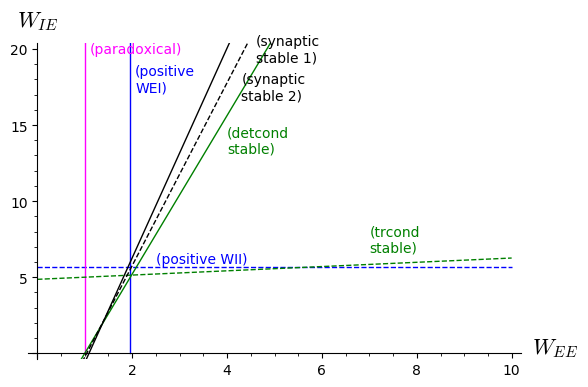

In [39]:
W_EE_max = 10
fig1 = line([[W_EE.subs(positive_WEI_cond_border_pdx),0],[W_EE.subs(positive_WEI_cond_border_pdx),50]],color='blue',linestyle='-',legend_label='positive WEI')
fig2 = line([[0,W_IE.subs(positive_WII_cond_border_pdx)],[W_EE_max,W_IE.subs(positive_WII_cond_border_pdx)]],color='blue',linestyle='--',legend_label='positive WEI')
fig3 = line([[W_EE.subs(paradox_cond_border_pdx),0],[W_EE.subs(paradox_cond_border_pdx),50]],color='magenta',legend_label='paradoxical')
fig4 = plot(W_IE.subs(neural_stable_detcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='-',legend_label='neural detcond')
fig5 = plot(W_IE.subs(neural_stable_trcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='--',legend_label='neural trcond')
#fig6 = plot(W_IE.subs(up_exist_cond_2_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='black',linestyle='--',legend_label='up exists')
fig7 = plot(W_IE.subs(synaptic_stable_cond1_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='black',linestyle='-',legend_label='synaptic stable 1')
fig8 = plot(W_IE.subs(synaptic_stable_cond2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='black',linestyle='--',legend_label='synaptic stable 2')
tt1 = text('(positive\nWEI)', (0.1+W_EE.subs(positive_WEI_cond_border_pdx),18),color='blue',horizontal_alignment='left')
tt2 = text('(positive WII)', (2.5,0.5+W_IE.subs(positive_WII_cond_border_pdx)),color='blue',horizontal_alignment='left')
tt3 = text('(paradoxical)', (0.1+W_EE.subs(paradox_cond_border_pdx),20),color='magenta',horizontal_alignment='left')
tt4 = text('(detcond\nstable)', (4,14),color='green',horizontal_alignment='left')
tt5 = text('(trcond\nstable)', (7,7.5),color='green',horizontal_alignment='left')
#tt6 = text('(up exists)', (3.1,10),color='black',horizontal_alignment='left')
tt7 = text('(synaptic\nstable 1)', (4.6,20),color='black',horizontal_alignment='left')
tt8 = text('(synaptic\nstable 2)', (4.3,17.5),color='black',horizontal_alignment='left')
#fig = fig1 + fig2 + fig3 + fig4 + fig5 + fig6 + fig7 + fig8 + tt1 + tt2 + tt3 + tt4 + tt5 + tt6 + tt7 + tt8
fig = fig1 + fig2 + fig3 + fig4 + fig5 + fig7 + fig8 + tt1 + tt2 + tt3 + tt4 + tt5 + tt7 + tt8
fig.xmin(0)
fig.xmax(W_EE_max)
fig.ymin(0)
fig.ymax(20)
fig.axes_labels(['$W_{EE}$', '$W_{IE}$'])
fig.set_legend_options(loc='upper right')
fig.legend(False)
fig.save('FB_stability_paradoxical.pdf')
show(fig)